<h1>Airplane Delays Solution LATAM Test</h1>

<h2>Pre Steps</h2>
<h4>Import libraries</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day
)
from datetime import datetime

<h2> First challenge </h2>
<h4> Import data into Pandas DataFrame </h4>

In [2]:
dataset_scl = pd.read_csv("dataset_SCL.csv")

columns_names = list(dataset_scl)
dataset_scl.head()

C:\Users\Felipe\AppData\Local\Temp/ipykernel_36608/1755922022.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_scl = pd.read_csv("dataset_SCL.csv")


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


<h4>Shape of dataset</h4>

In [3]:
total_rows, total_columns = dataset_scl.shape
print("Total columns: {} \nTotal rows: {}".format(total_columns, total_rows))

Total columns: 18 
Total rows: 68206


<h4>Dataset info</h4>
<p>As we can see, the datasets have a null value in the Vlo-O column and have 18 columns and 68206 rows</p>

In [4]:
dataset_scl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [5]:
#Check row with NaN Vlo-O
dataset_scl[dataset_scl['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


<h4>Clean dataset</h4>
<p>The row 6068 have a Not a Number value, as we can't get the missing value, we will drop this row to clean the dataset</p>

In [6]:
clean_dataset_scl = dataset_scl.dropna()
clean_dataset_scl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68205 non-null  object
 1   Vlo-I      68205 non-null  object
 2   Ori-I      68205 non-null  object
 3   Des-I      68205 non-null  object
 4   Emp-I      68205 non-null  object
 5   Fecha-O    68205 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68205 non-null  object
 8   Des-O      68205 non-null  object
 9   Emp-O      68205 non-null  object
 10  DIA        68205 non-null  int64 
 11  MES        68205 non-null  int64 
 12  AÑO        68205 non-null  int64 
 13  DIANOM     68205 non-null  object
 14  TIPOVUELO  68205 non-null  object
 15  OPERA      68205 non-null  object
 16  SIGLAORI   68205 non-null  object
 17  SIGLADES   68205 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [7]:
#Get all differents ocurrencies for all columns
print_ocurrencies(dataset_scl, columns_names)

Ocurrencies for Fecha-I column
2017-07-28 13:30:00    6
2017-03-26 18:00:00    6
2017-03-19 18:00:00    6
2017-11-14 09:30:00    5
2017-08-01 05:00:00    5
                      ..
2017-06-02 15:16:00    1
2017-06-03 15:16:00    1
2017-06-04 15:16:00    1
2017-06-05 15:16:00    1
2017-12-31 14:55:00    1
Name: Fecha-I, Length: 53252, dtype: int64


Ocurrencies for Vlo-I column
174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64


Ocurrencies for Ori-I column
SCEL    68206
Name: Ori-I, dtype: int64


Ocurrencies for Des-I column
SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64


Ocurrencies for Emp-I column
LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA  

<p>Some columns are redundant, for example, SIGLAORI, Ori-I and Ori-O have the same value in all dataset, as we show in the cell above</p>

In [8]:
print_ocurrencies(dataset_scl, ['SIGLAORI', 'Ori-I', 'Ori-O'])

Ocurrencies for SIGLAORI column
Santiago    68206
Name: SIGLAORI, dtype: int64


Ocurrencies for Ori-I column
SCEL    68206
Name: Ori-I, dtype: int64


Ocurrencies for Ori-O column
SCEL    68206
Name: Ori-O, dtype: int64




<p>In the case of AÑO, we have only 2 row with AÑO equal 2018 in a dataset with 68205, then, in the practice, could be dropped too</p>

In [9]:
print("Ocurrencies for AÑO column")
clean_dataset_scl['AÑO'].value_counts()

Ocurrencies for AÑO column


2017    68203
2018        2
Name: AÑO, dtype: int64

In [10]:
#Check the Flights with AÑO 2018
clean_dataset_scl[clean_dataset_scl['AÑO']==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


<h4>Drop useless columns</h4>

In [11]:
final_dataset_scl = clean_dataset_scl.drop(['AÑO', 'Ori-I', 'Ori-O', 'SIGLAORI'], axis = 1)
final_dataset_scl.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,Domingo,I,American Airlines,Miami
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,Lunes,I,American Airlines,Miami
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,Martes,I,American Airlines,Miami
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,Miercoles,I,American Airlines,Miami
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,Jueves,I,American Airlines,Miami


<h4>Check distribution in histogram for time of the day</h4>

(array([1155., 1684.,  665.,  546., 1184., 2616., 3860., 4570., 4341.,
        3488., 2564., 3551., 3440., 3504., 3866., 3834., 3248., 3491.,
        3873., 3724., 3034., 2364., 2249., 1354.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

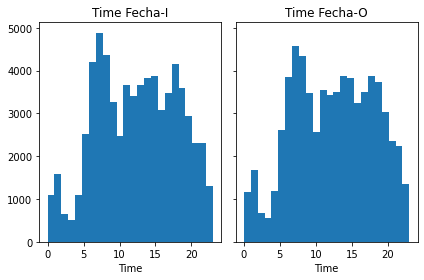

In [12]:

fecha_i = list(map(lambda dt: datetime.strptime(dt,'%Y-%m-%d %H:%M:%S'), final_dataset_scl['Fecha-I'].to_numpy()))
fecha_o = list(map(lambda dt: datetime.strptime(dt,'%Y-%m-%d %H:%M:%S'), final_dataset_scl['Fecha-O'].to_numpy()))
hour_list_i = [t.hour for t in fecha_i]
hour_list_o = [t.hour for t in fecha_o]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].set_xlabel('Time')
axs[1].set_xlabel('Time')
axs[0].set_title('Time Fecha-I')
axs[1].set_title('Time Fecha-O')
axs[0].hist(hour_list_i, bins=24)
axs[1].hist(hour_list_o, bins=24)



<h4>Check distribution in histogram for date</h4>

array([[<Axes: title={'center': 'DIA'}>, <Axes: title={'center': 'MES'}>]],
      dtype=object)

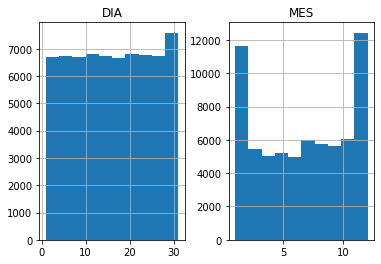

In [13]:
final_dataset_scl.hist()


<h4>Check distribution in barchar for DIANOM</h4>

{'Viernes': 10292, 'Jueves': 10250, 'Lunes': 10131, 'Domingo': 9796, 'Miercoles': 9722, 'Martes': 9662, 'Sabado': 8352}


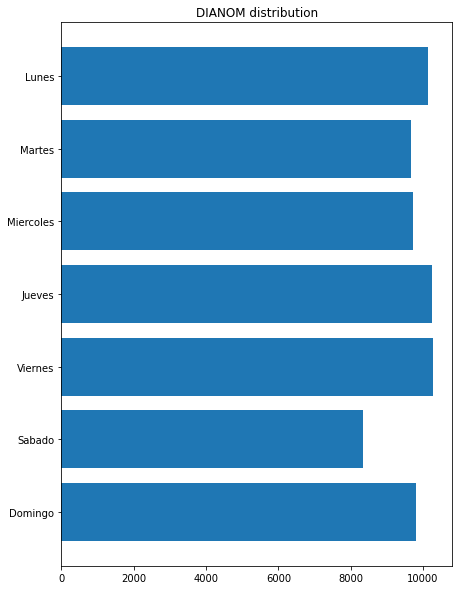

In [14]:
dianom_dict = final_dataset_scl['DIANOM'].value_counts().to_dict()
print(dianom_dict)
#Get ordered list from DIANOM to create a barchar with ordered days of the week
ordered_dianom_dict =  dict(map(lambda day: (day, dianom_dict[day]), 
                                ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
                               )
                           )
plot_barchar(ordered_dianom_dict, 'DIANOM')

<p>With both histograms, we can see the hours with more flight</p>

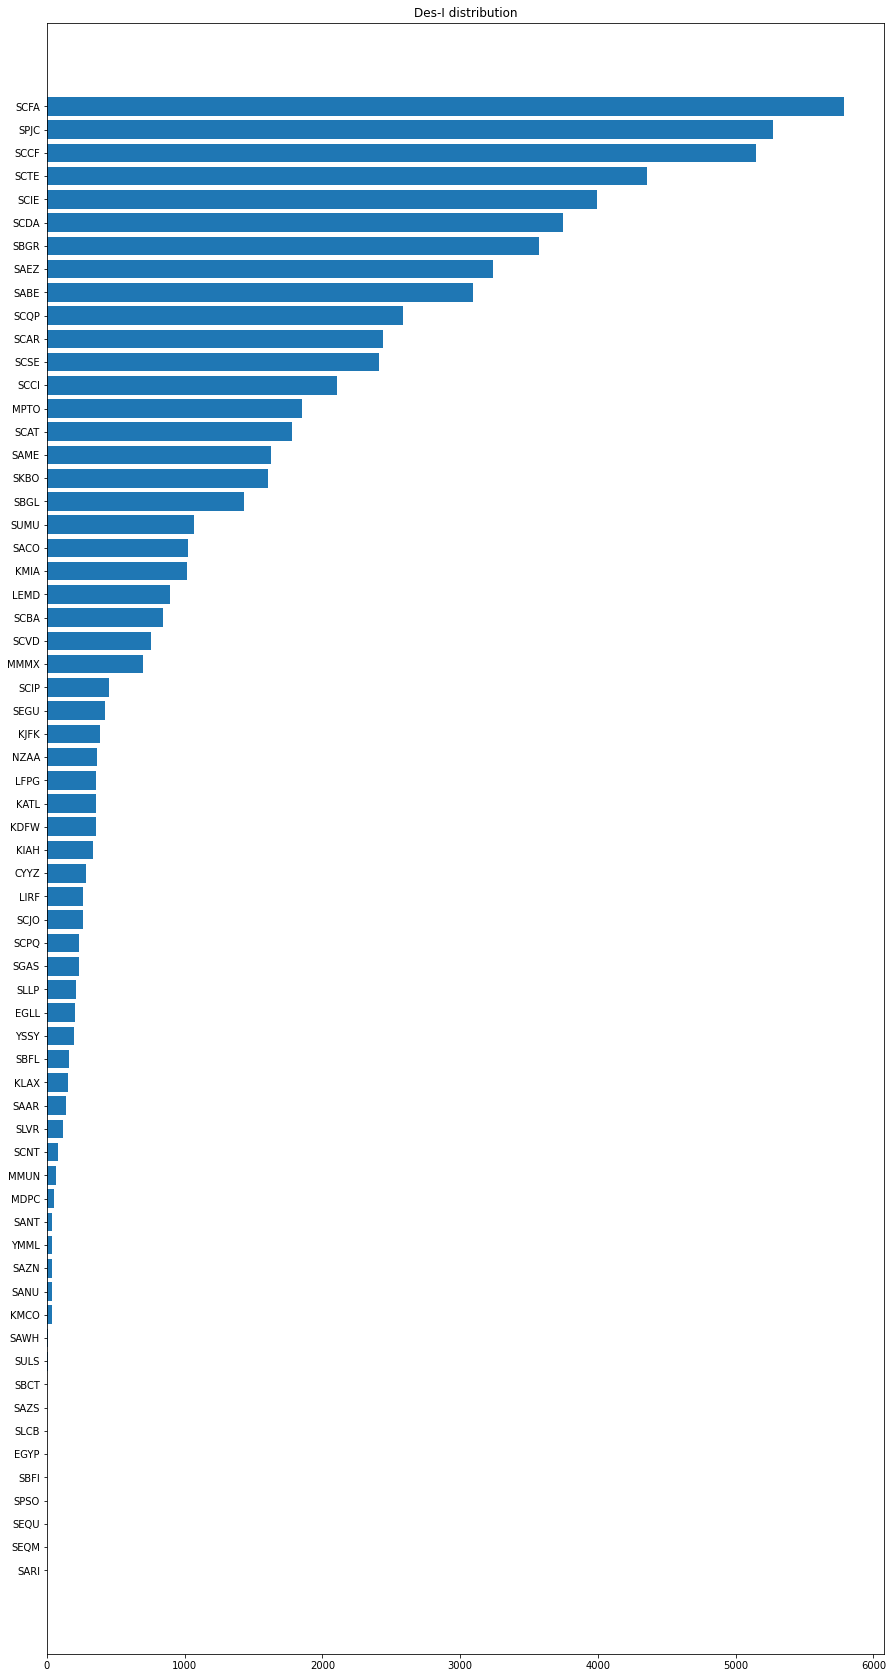

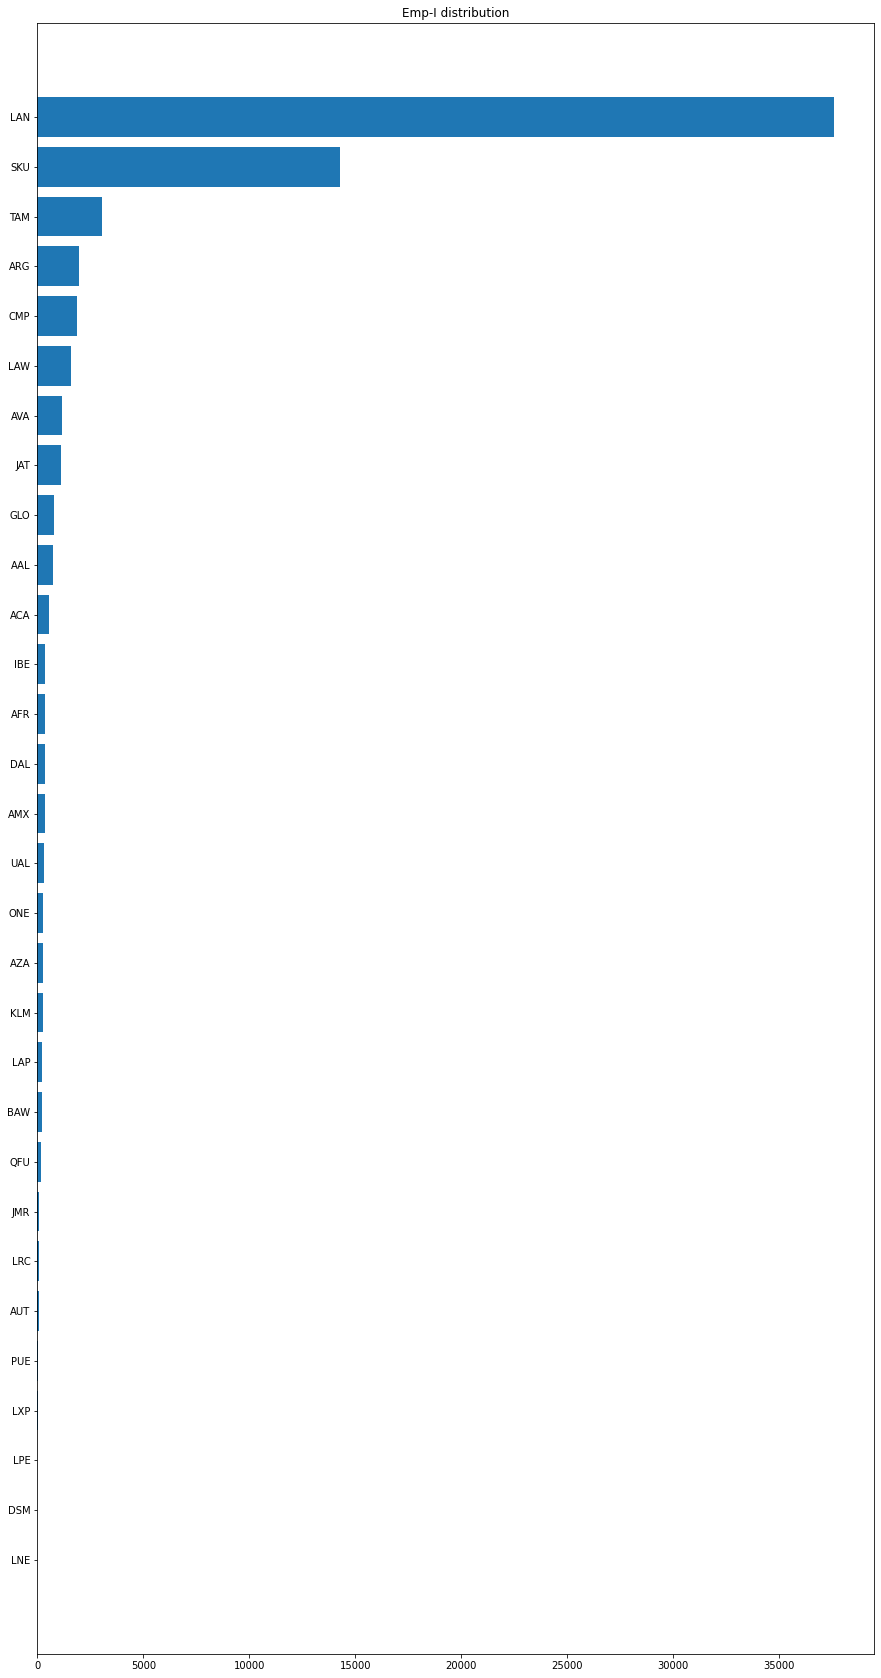

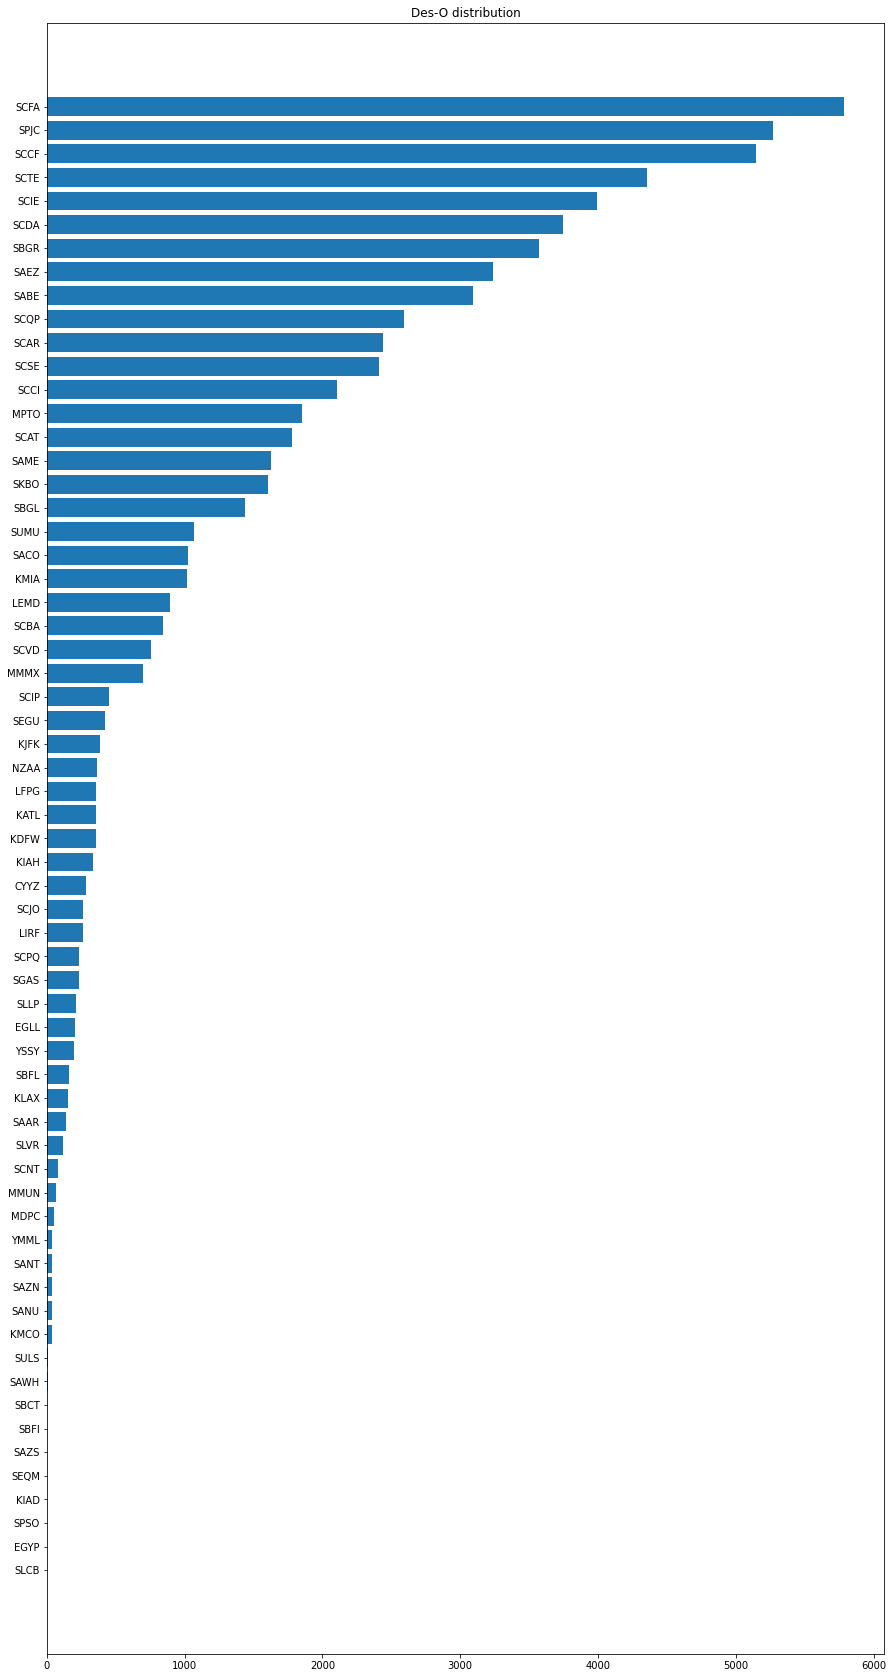

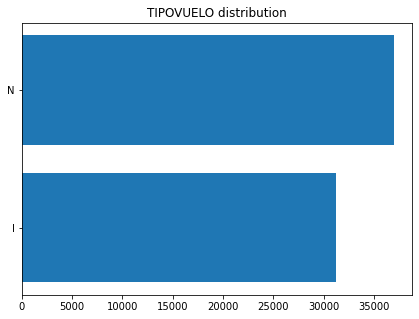

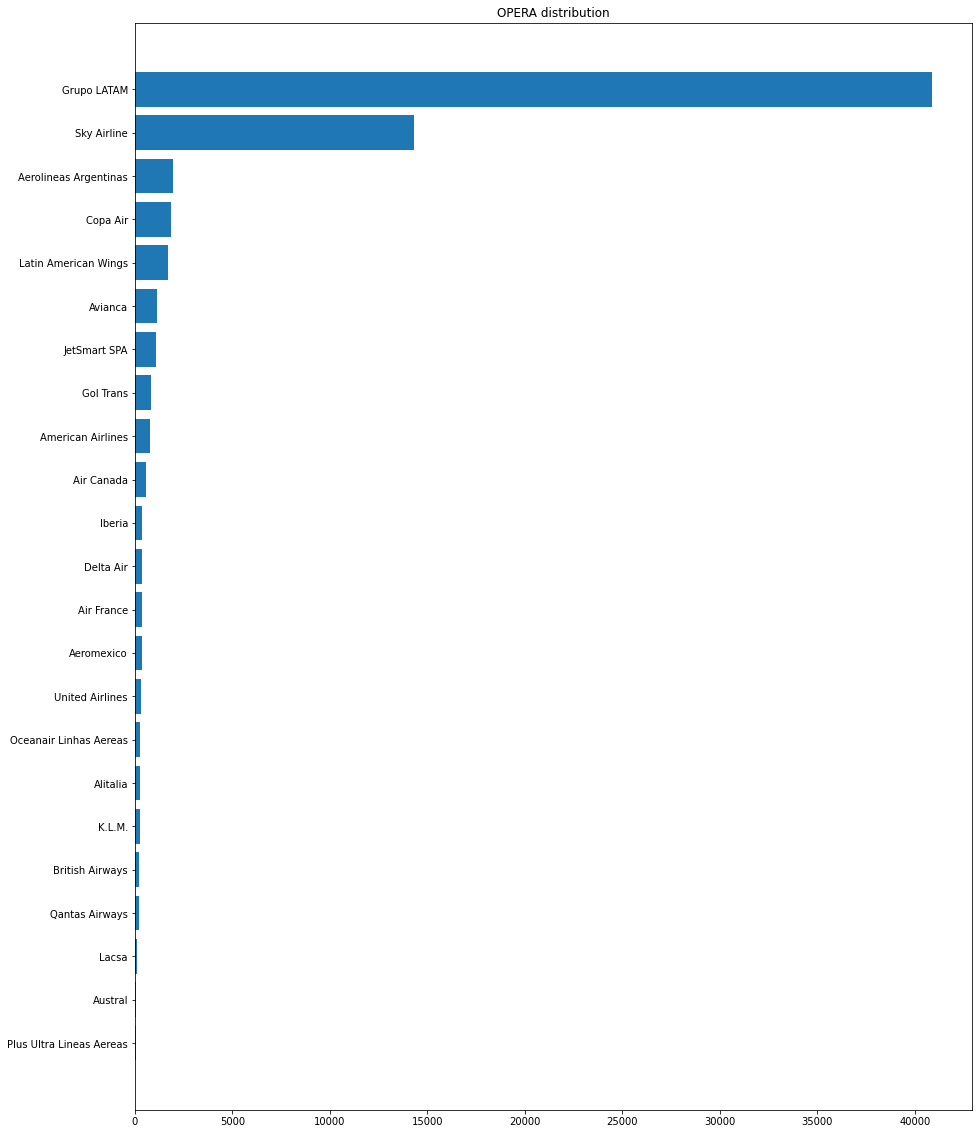

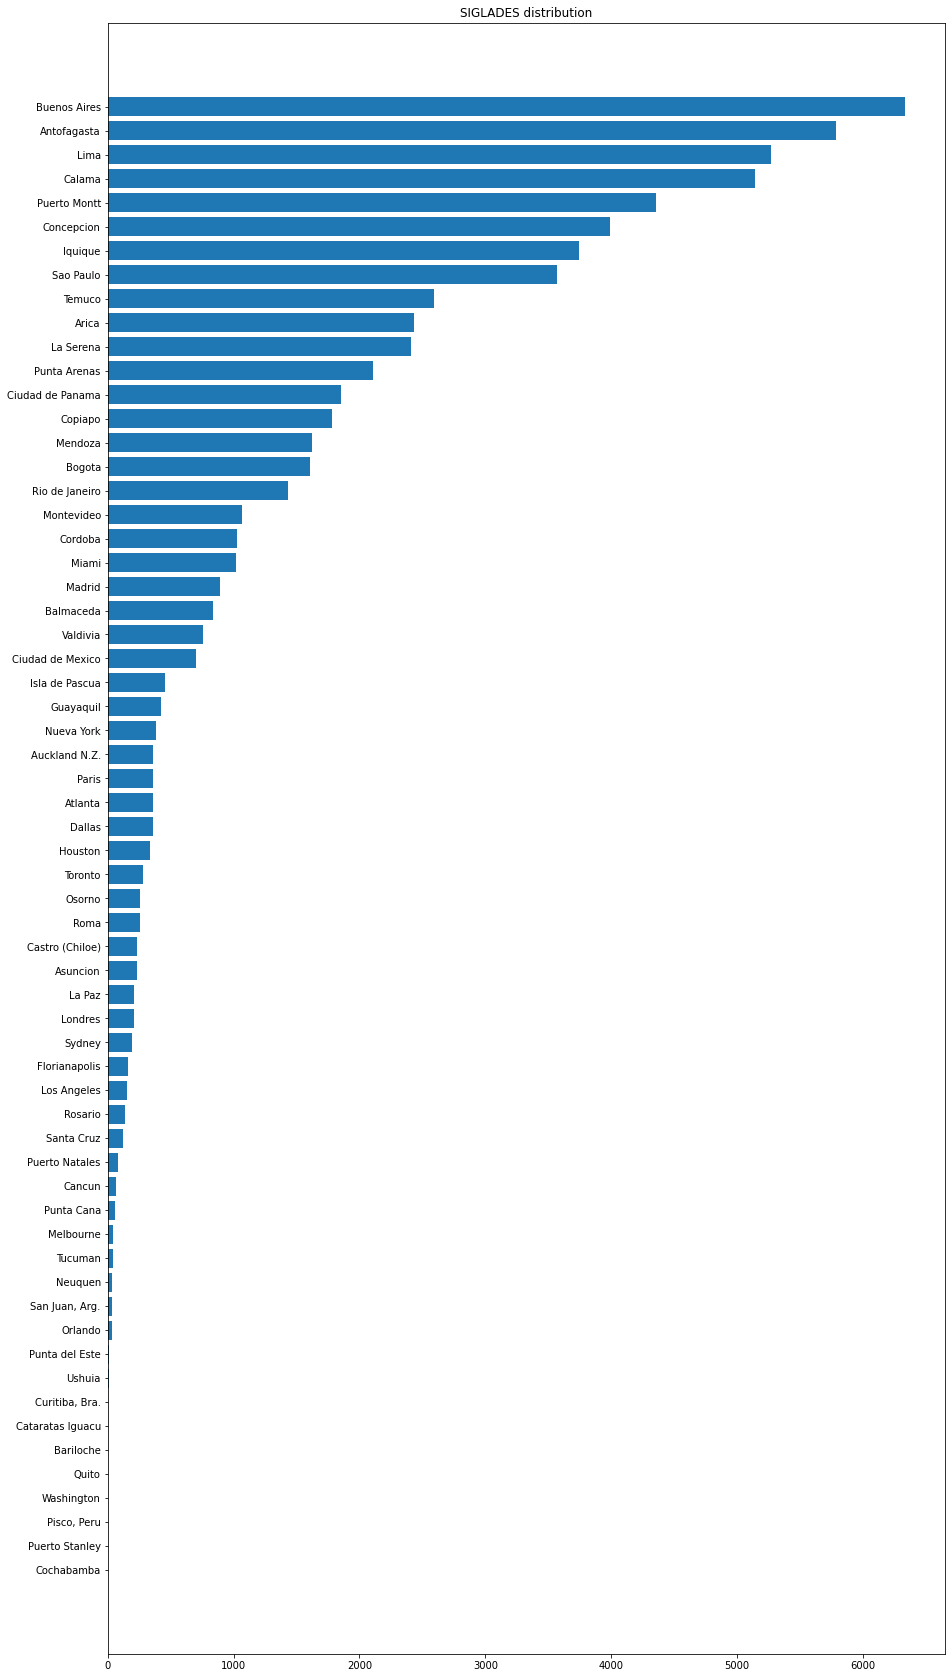

In [15]:
categorical_columns = ['Des-I', 'Emp-I', 'Des-O', 'TIPOVUELO', 'OPERA', 'SIGLADES']
plot_multiple_barchar(final_dataset_scl, categorical_columns)


<h4>Summary</h4>
<ul>
    <li>
        As we can see, in the notebook, with the charts, tables and distributions we can remove at least 4 columns in a first step.
    </li>
    <li>
        The data required to be cleaned before to process it and corroborates that the most important step in a data analysis process is the data exploration.
    </li>    
    <li>
        The most flight departure from Santiago and arrivals to Buenos Aires, Antofagasta and Lima.
    </li>
    <li>
        Grupo LATAM was the most important airline in Santiago de Chile during 2017 year.
    </li>
    
</ul>

<h2> Second challenge </h2>
<h4> Create new columns </h4>

In [16]:
synthetic_features = final_dataset_scl.assign(high_season=lambda df: get_high_season(df['Fecha-I']))
synthetic_features = synthetic_features.assign(
    min_diff=lambda df: (
        pd.to_datetime(
            df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
    ).dt.total_seconds() / 60
)
synthetic_features = synthetic_features.assign(delay_15=lambda df: (df['min_diff'] > 15).astype(int))
synthetic_features = synthetic_features.assign(period_day=lambda df: get_period_day(df['Fecha-I']))

synthetic_features.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,Domingo,I,American Airlines,Miami,1,3.0,0,night
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,Lunes,I,American Airlines,Miami,1,9.0,0,night
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,Martes,I,American Airlines,Miami,1,9.0,0,night
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,Miercoles,I,American Airlines,Miami,1,3.0,0,night
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,Jueves,I,American Airlines,Miami,1,-2.0,0,night


In [17]:
synthetic_features[synthetic_features['period_day']=='morning']

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15,period_day
201,2017-01-01 10:35:00,1281,SABE,ARG,2017-01-01 10:25:00,1281,SABE,ARG,1,1,Domingo,I,Aerolineas Argentinas,Buenos Aires,1,-10.0,0,morning
202,2017-01-02 10:35:00,1281,SABE,ARG,2017-01-02 10:37:00,1281,SABE,ARG,2,1,Lunes,I,Aerolineas Argentinas,Buenos Aires,1,2.0,0,morning
203,2017-01-03 10:35:00,1281,SABE,ARG,2017-01-03 10:33:00,1281,SABE,ARG,3,1,Martes,I,Aerolineas Argentinas,Buenos Aires,1,-2.0,0,morning
204,2017-01-04 10:35:00,1281,SABE,ARG,2017-01-04 11:06:00,1281,SABE,ARG,4,1,Miercoles,I,Aerolineas Argentinas,Buenos Aires,1,31.0,1,morning
205,2017-01-05 10:35:00,1281,SABE,ARG,2017-01-05 10:53:00,1281,SABE,ARG,5,1,Jueves,I,Aerolineas Argentinas,Buenos Aires,1,18.0,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68168,2017-12-15 08:55:00,281,SCQP,JAT,2017-12-15 08:56:00,281.0,SCQP,JAT,15,12,Viernes,N,JetSmart SPA,Temuco,1,1.0,0,morning
68171,2017-12-20 11:57:00,281,SCQP,JAT,2017-12-20 12:02:00,281.0,SCQP,JAT,20,12,Miercoles,N,JetSmart SPA,Temuco,1,5.0,0,morning
68173,2017-12-22 08:55:00,281,SCQP,JAT,2017-12-22 09:01:00,281.0,SCQP,JAT,22,12,Viernes,N,JetSmart SPA,Temuco,1,6.0,0,morning
68177,2017-12-27 11:57:00,281,SCQP,JAT,2017-12-27 11:58:00,281.0,SCQP,JAT,27,12,Miercoles,N,JetSmart SPA,Temuco,1,1.0,0,morning


In [18]:
synthetic_features.to_csv('synthetic_features.csv', index=False)